<a href="https://colab.research.google.com/github/tanmaymaloo/Bangali_Handwritten_Grapheme_Classification/blob/master/Pytorch_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from torchvision import datasets
import numpy as np
torch.manual_seed(0)

In [0]:
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True,download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,download=True, transform=transform)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


In [0]:
# Create training and test dataloaders

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:362: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


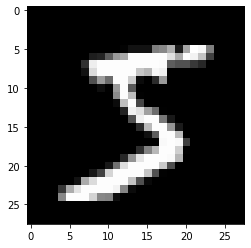

In [0]:
plt.imshow(train_data[0][0].resize(28,28).numpy(),cmap='gray')
plt.show()


In [0]:
#transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247,0.243, 0.261))])

'''trainset = tv.datasets.CIFAR10(root='./data',  train=True,download=True, transform=transform)

dataloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)

testset = tv.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)'''

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def image_show(dataset):
  plt.imshow(dataset[0].reshape(28,28).numpy(),cmap='gray')
  plt.show()

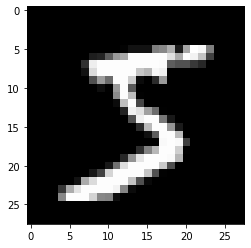

5


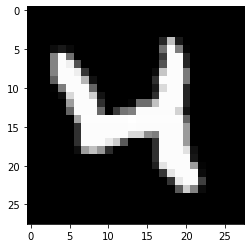

4


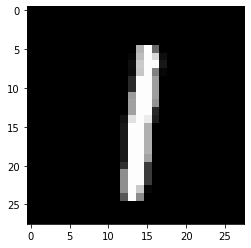

1


In [0]:
for n,image in enumerate(train_loader):
  image_show(image[0])
  print(image[1][0].item())
  if n==2:
    break

In [0]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,1,kernel_size=5),
            nn.ReLU(True))

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
#defining some params
num_epochs = 5 #you can go for more epochs, I am using a mac
batch_size = 20

In [0]:
model = Autoencoder()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

In [0]:
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        # ===================forward=====================
        output = model(img)
        loss = distance(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/5], loss:0.0036
epoch [2/5], loss:0.0030
epoch [3/5], loss:0.0011
epoch [4/5], loss:0.0012
epoch [5/5], loss:0.0004


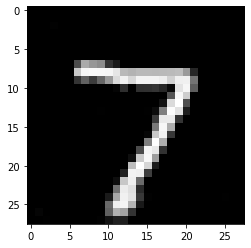

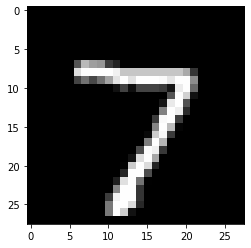

In [0]:
count=0
for data in test_loader:
        count=count+1
        img, _ = data
        output2=model(img)
        output3=output2[0].detach()
        image_show(output3)
        if count==1:
          break

count=0
for data in test_loader:
        count=count+1
        img, _ = data
        image_show(img)
        if count==1:
          break

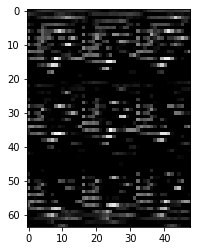

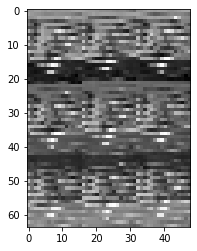

In [0]:
count=0
model.eval()
for data in testloader:
  count+=1
  img,_=data

  output2=model(img)
  image_show(output2.detach())
  image_show(img)
  if count==1:   
    break

In [0]:

output[0][1]

tensor([[0.1682, 0.0241, 0.0119,  ..., 0.0270, 0.1060, 0.2811],
        [0.0909, 0.0000, 0.0000,  ..., 0.0220, 0.0000, 0.1417],
        [0.0660, 0.0000, 0.0000,  ..., 0.0469, 0.0000, 0.0578],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0927, 0.4982, 0.4047],
        [0.0634, 0.0000, 0.0000,  ..., 0.3924, 0.5018, 0.3723],
        [0.2435, 0.1162, 0.0086,  ..., 0.5760, 0.4961, 0.3784]],
       grad_fn=<SelectBackward>)

In [0]:
data[1][0]

tensor(3)